## **Load and Explore Dataset**

In [1]:
from sklearn.pipeline import make_pipeline
import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("marketing_campaign (1).csv")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [7]:
# Basic Information -
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## **Handle Missing Values**

In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [10]:
#percentage of missing values

missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [11]:
#Drop the missing values
df.dropna(inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## **Treat Duplicate Values**

In [12]:
print(f"Duplicate Values:{df.duplicated().sum()}")


Duplicate Values:0


## **Feature Engineering**

In [13]:
# Customer Age
df['Age'] = 2025 - df['Year_Birth']

In [14]:
# Total Spend across all product categories
product_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpend'] = df[product_cols].sum(axis=1)

In [15]:
purchase_cols = [
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth']
df['TotalPurchases'] = df[purchase_cols].sum(axis=1)

In [16]:
# Family Size
df['FamilySize'] = df['Kidhome'] + df['Teenhome']

In [17]:
print(df[['Age','TotalSpend','TotalPurchases','FamilySize']].head())

   Age  TotalSpend  TotalPurchases  FamilySize
0   68        1617              32           0
1   71          27              11           2
2   60         776              25           0
3   41          53              14           1
4   44         422              24           1


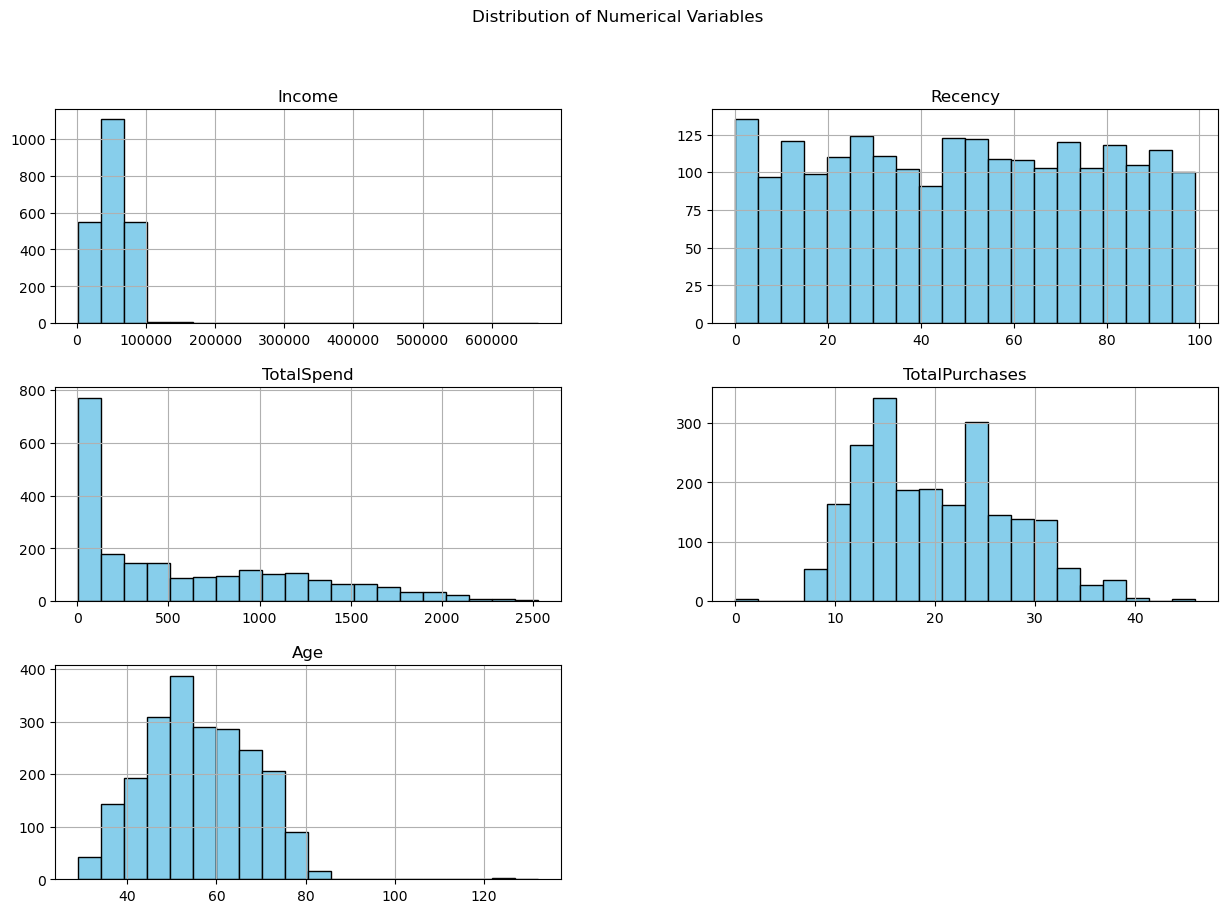

In [18]:
# Plot histograms for numerical columns
num_cols = ['Income', 'Recency', 'TotalSpend', 'TotalPurchases', 'Age']
df[num_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Variables')
plt.show()

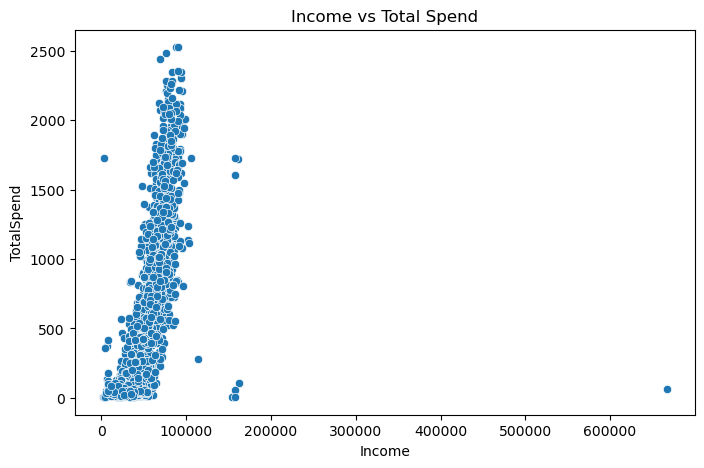

In [19]:
# 1. Income vs Total Spend
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Income', y='TotalSpend')
plt.title("Income vs Total Spend")
plt.show()

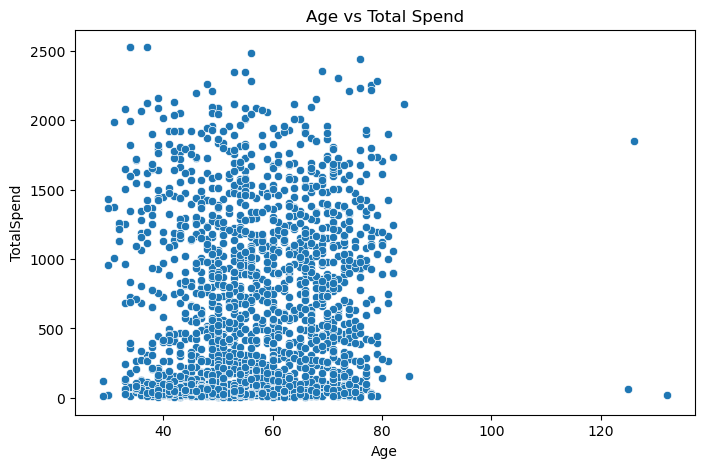

In [20]:
# 2. Age vs Total Spend
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='TotalSpend')
plt.title("Age vs Total Spend")
plt.show()

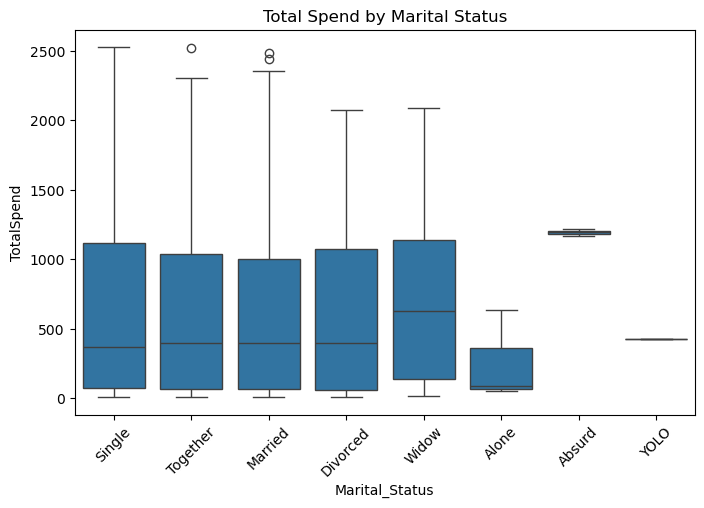

In [21]:
# 3. Total Spend by Marital Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Marital_Status', y='TotalSpend')
plt.title("Total Spend by Marital Status")
plt.xticks(rotation=45)
plt.show()

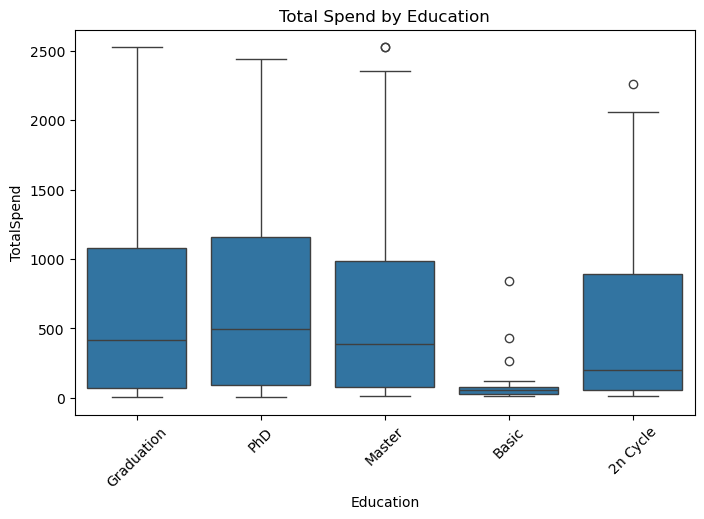

In [22]:

# 4. Total Spend by Education
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Education', y='TotalSpend')
plt.title("Total Spend by Education")
plt.xticks(rotation=45)
plt.show()

## **Outlier Detection**

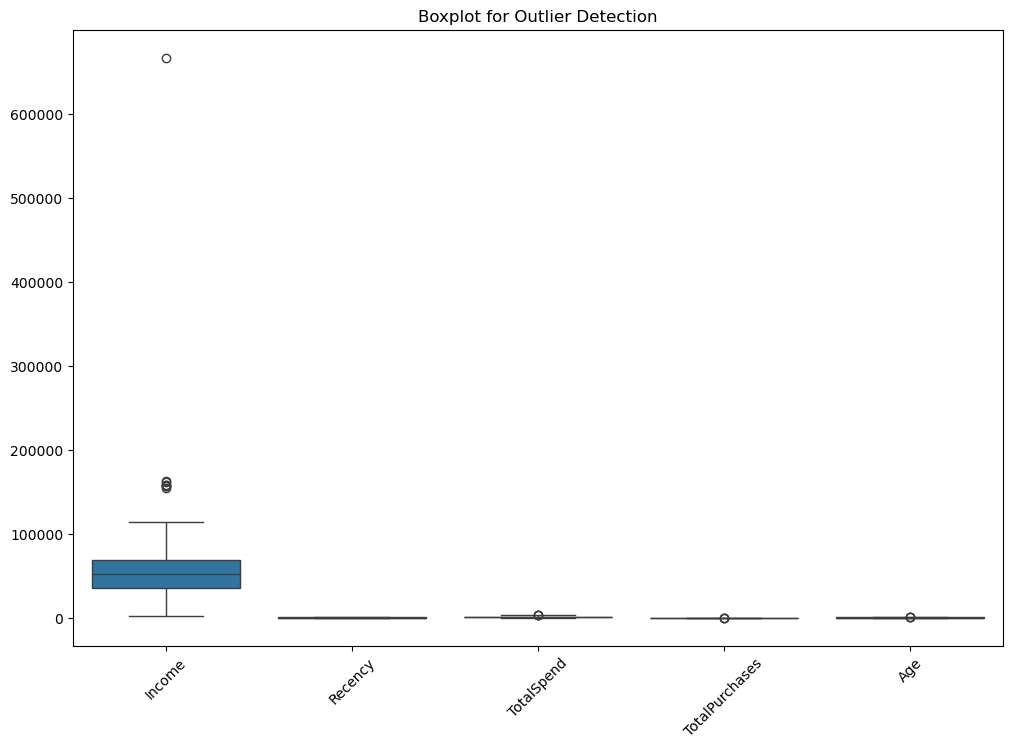

In [23]:
# plot Boxplot for outlier detection
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [24]:
# Outlier Detection: User defined Function to calculate Upper Extreme and Lower Extreme value
def outlier_detection(df,colname):
  q1 = df[colname].quantile(0.25)
  q3 = df[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

In [25]:
outlier_detection(df,'Income')

(-14525.5, 118350.5, 35303.0, 68522.0)

In [26]:
outlier_detection(df,'TotalSpend')

(-1399.5, 2516.5, 69.0, 1048.0)

In [27]:
outlier_detection(df,'TotalPurchases')

(-2.5, 41.5, 14.0, 25.0)

In [28]:
outlier_detection(df,'Age')

(21.0, 93.0, 48.0, 66.0)

## **Capping Outliers**

In [29]:
# Capping Outliers of Income column
df.loc[df['Income']>118350.5,'Income'] = 118350.5

In [30]:
# Capping Outliers of TotalSpend column
df.loc[df['TotalSpend']>2516.5,'TotalSpend'] = 2516.5

C:\Users\SSPC\AppData\Local\Temp\ipykernel_10684\1194203949.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2516.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['TotalSpend']>2516.5,'TotalSpend'] = 2516.5


In [31]:
# Capping Outliers of TotalPurchase column
df.loc[df['TotalPurchases']>41.5,'TotalPurchases'] = 41.5

C:\Users\SSPC\AppData\Local\Temp\ipykernel_10684\3577391453.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '41.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['TotalPurchases']>41.5,'TotalPurchases'] = 41.5


In [32]:
# Capping Outliers of Age column
df.loc[df['Age']>93.0,'Age'] = 93.0

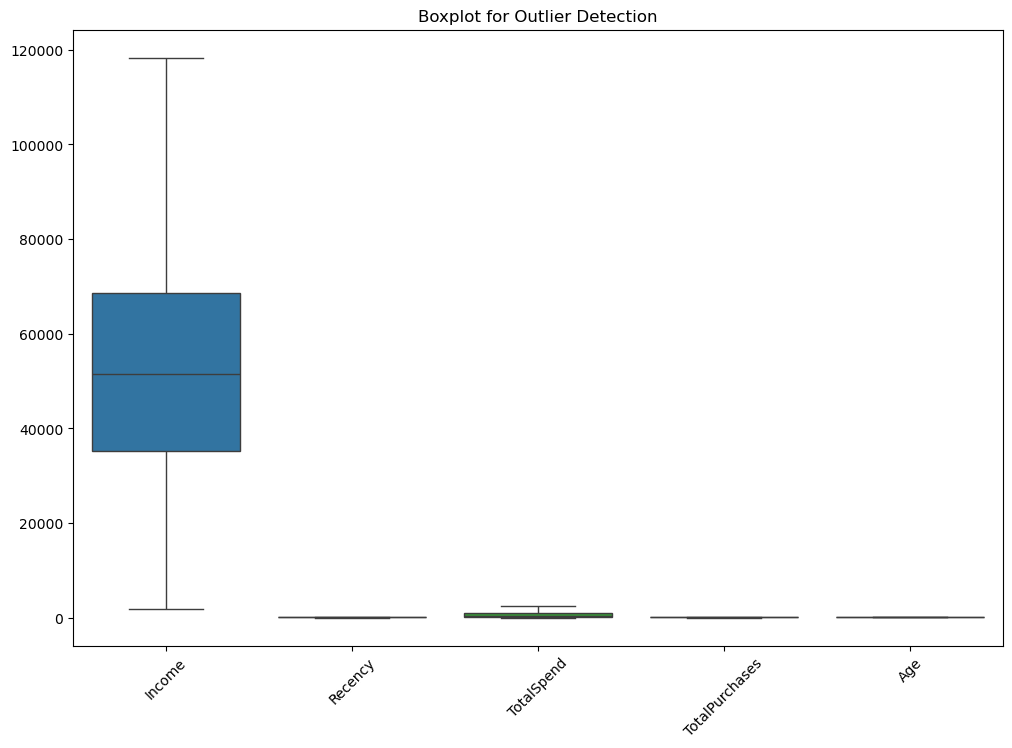

In [33]:
# plot Boxplot for outlier detection
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

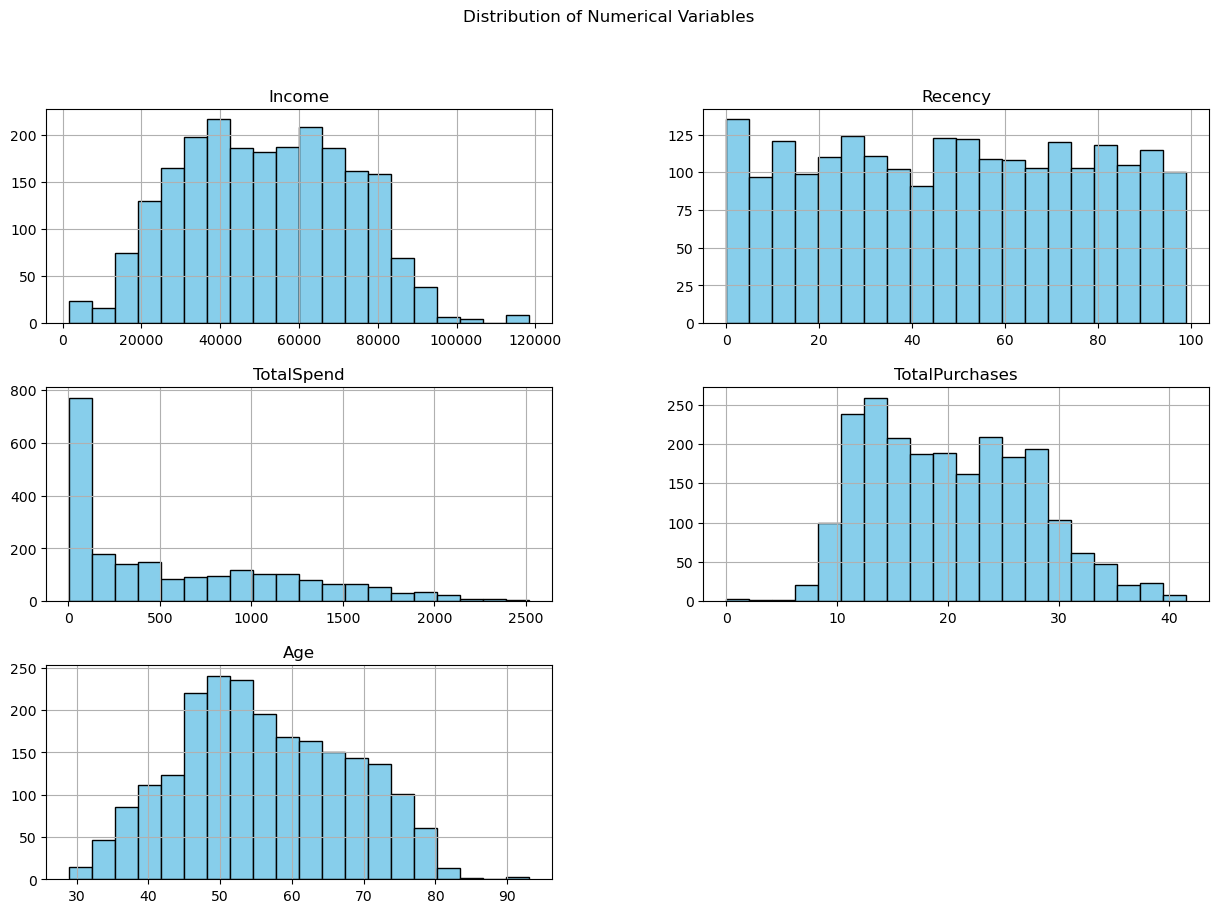

In [34]:
df[num_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Variables')
plt.show()

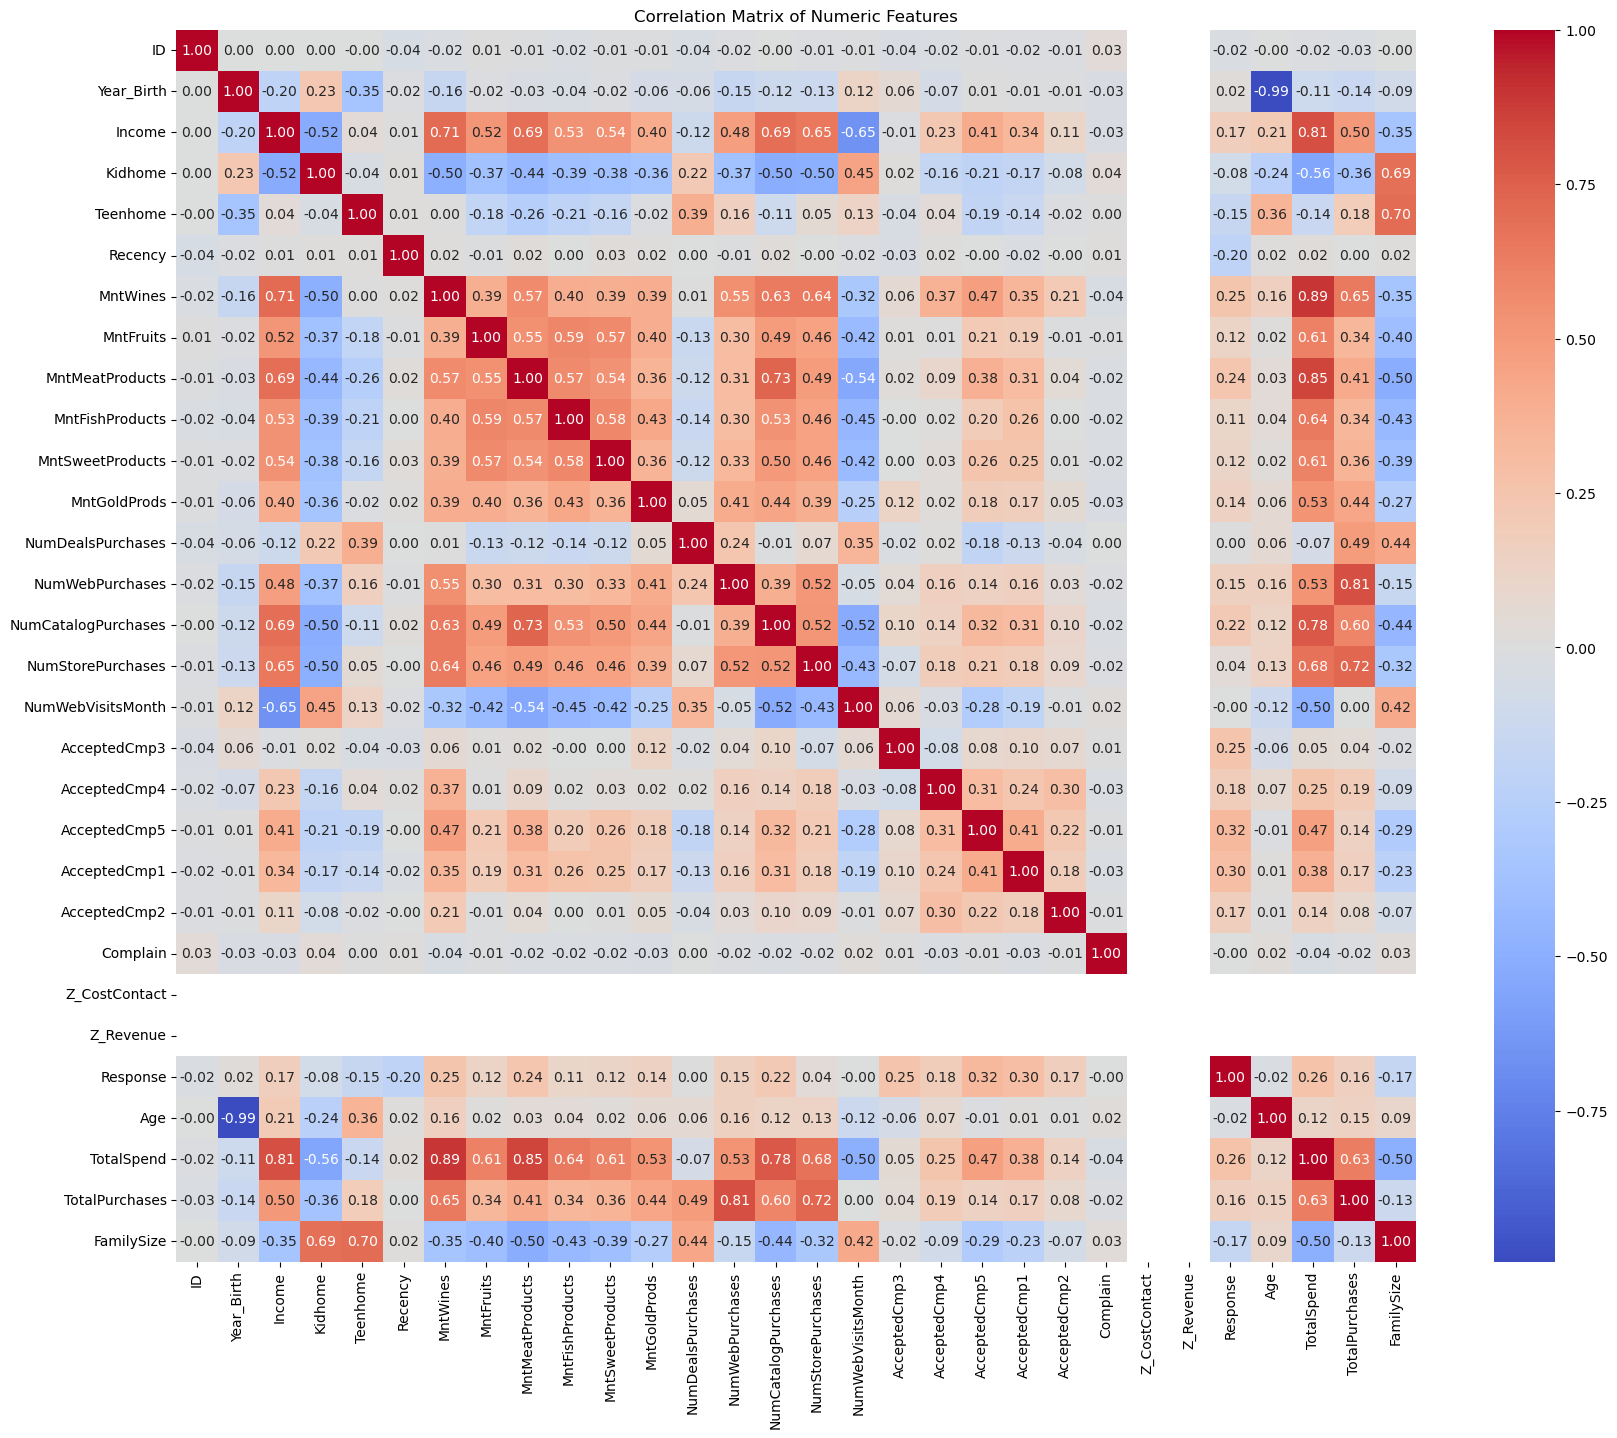

In [35]:
# Correlation matrix
plt.figure(figsize=(20, 16))
# Select only numerical features for correlation analysis
numerical_data = df.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [36]:
# save cleaned data set

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_marketing_campaign.csv', index=False)

## **K-Means Clustering**

In [4]:
df1=pd.read_csv("cleaned_marketing_campaign.csv")
df1

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2211  10870        1967  Graduation        Married  61223.0        0   
2212   4001        1946         PhD       Together  64014.0        2   
2213   7270        1981  Graduation       Divorced  56981.0        0   
2214   8235        1956      Master       Together  69245.0        0   
2215   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2211         1  2013-06-13       46       709  ...             0   
2212         1  2014-06-10       56       406  ...             1   
2213         0  2014-01-25       91       908  ...             0   
2214         1  2014-01-24        8       428  ...             0   
2215         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  \
0                0         0              3         11         1   68   
1                0         0              3         11         0   71   
2                0         0              3         11         0   60   
3                0         0              3         11         0   41   
4                0         0              3         11         0   44   
...            ...       ...            ...        ...       ...  ...   
2211             0         0              3         11         0   58   
2212             0         0              3         11         0   79   
2213             0         0              3         11         0   44   
2214             0         0              3         11         0   69   
2215             0         0              3         11         1   71   

      TotalSpend  TotalPurchases  FamilySize  
0         1617.0            32.0           0  
1           27.0            11.0           2  
2          776.0            25.0           0  
3           53.0            14.0           1  
4          422.0            24.0           1  
...          ...             ...         ...  
2211      1341.0            23.0           1  
2212       444.0            29.0           3  
2213      1241.0            25.0           0  
2214       843.0            26.0           1  
2215       172.0            18.0           2  

[2216 rows x 33 columns]

In [7]:
# Select features for clustering
features = ['Age', 'Income', 'TotalSpend', 'FamilySize','NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
X = df1[features]

In [8]:
# Normalization / Standardisation function
from sklearn.preprocessing import StandardScaler  # built in function for standardization

In [9]:
scaler = StandardScaler() # scaler is an object name of StandardScalar class, you can give any name
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.00842346,  0.29748327,  1.67560404, ...,  1.42855332,
        -0.55414289,  2.50471216],
       [ 1.26334776, -0.26266902, -0.96239602, ..., -1.12588116,
        -1.16951781, -0.57108239],
       [ 0.32862533,  0.93747411,  0.28028451, ...,  1.42855332,
         1.29198186, -0.22932744],
       ...,
       [-1.03097092,  0.24253192,  1.05177509, ..., -0.76096195,
         2.21504423,  0.11242751],
       [ 1.09339823,  0.8250067 ,  0.39144552, ...,  0.6987149 ,
         1.29198186,  0.79593741],
       [ 1.26334776,  0.04723378, -0.72182369, ..., -0.39604274,
        -0.55414289, -0.57108239]])

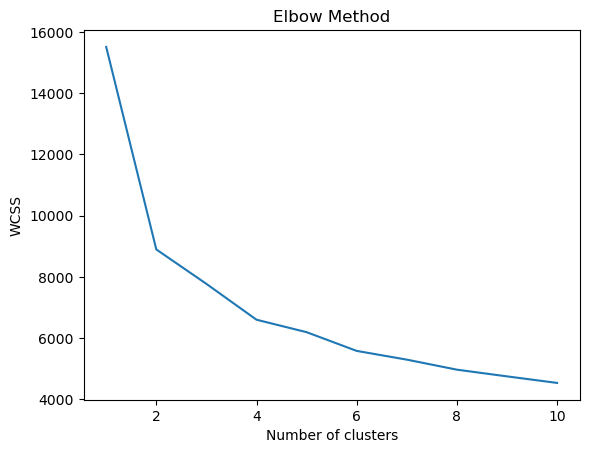

In [10]:
# Elbow Method to find optimal k
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(X_scaled) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#  Apply KMeans with optimal k
kmeans =KMeans(n_clusters=4, random_state=42) # pass no. of clusters as 4
Predict = kmeans.fit_predict(X_scaled)

In [29]:
Predict

array([1, 0, 2, ..., 3, 1, 0])

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
kmeans_score = silhouette_score(X_scaled,Predict)
kmeans_score

0.2755930029503656

### Hyperparameter tuning using Silhouette score

In [56]:
# Hyperparameter tuning using Silhouette score
best_k = 2  # Initialize with a default value
KM_score = -1

for k in range(2, 11): # Test k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Increase n_init for better results
    kmeans.fit_predict(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)

    if score > KM_score:
        KM_score = score
        best_k = k
        best_kmeans = kmeans  # Store the best KMeans model

print(f"Optimal number of clusters (k) based on Silhouette score: {best_k}")
print(f"Silhouette score for optimal k: {KM_score}")

Optimal number of clusters (k) based on Silhouette score: 2
Silhouette score for optimal k: 0.3819600521273969


In [57]:
labels = best_kmeans.labels_
labels

array([0, 1, 0, ..., 0, 0, 1])

In [40]:
# Assign clusters to the data set
df1['Cluster'] = labels

In [42]:
# Cluster Profiles
cluster_profile = df1.groupby('Cluster')[features].mean().round()
print("\nCluster Profiles:")
print(cluster_profile)


Cluster Profiles:
          Age   Income  TotalSpend  FamilySize  NumWebPurchases  \
Cluster                                                           
0        58.0  69730.0      1158.0         1.0              6.0   
1        54.0  36729.0       140.0         1.0              3.0   

         NumStorePurchases  NumCatalogPurchases  
Cluster                                          
0                      8.0                  5.0  
1                      4.0                  1.0  


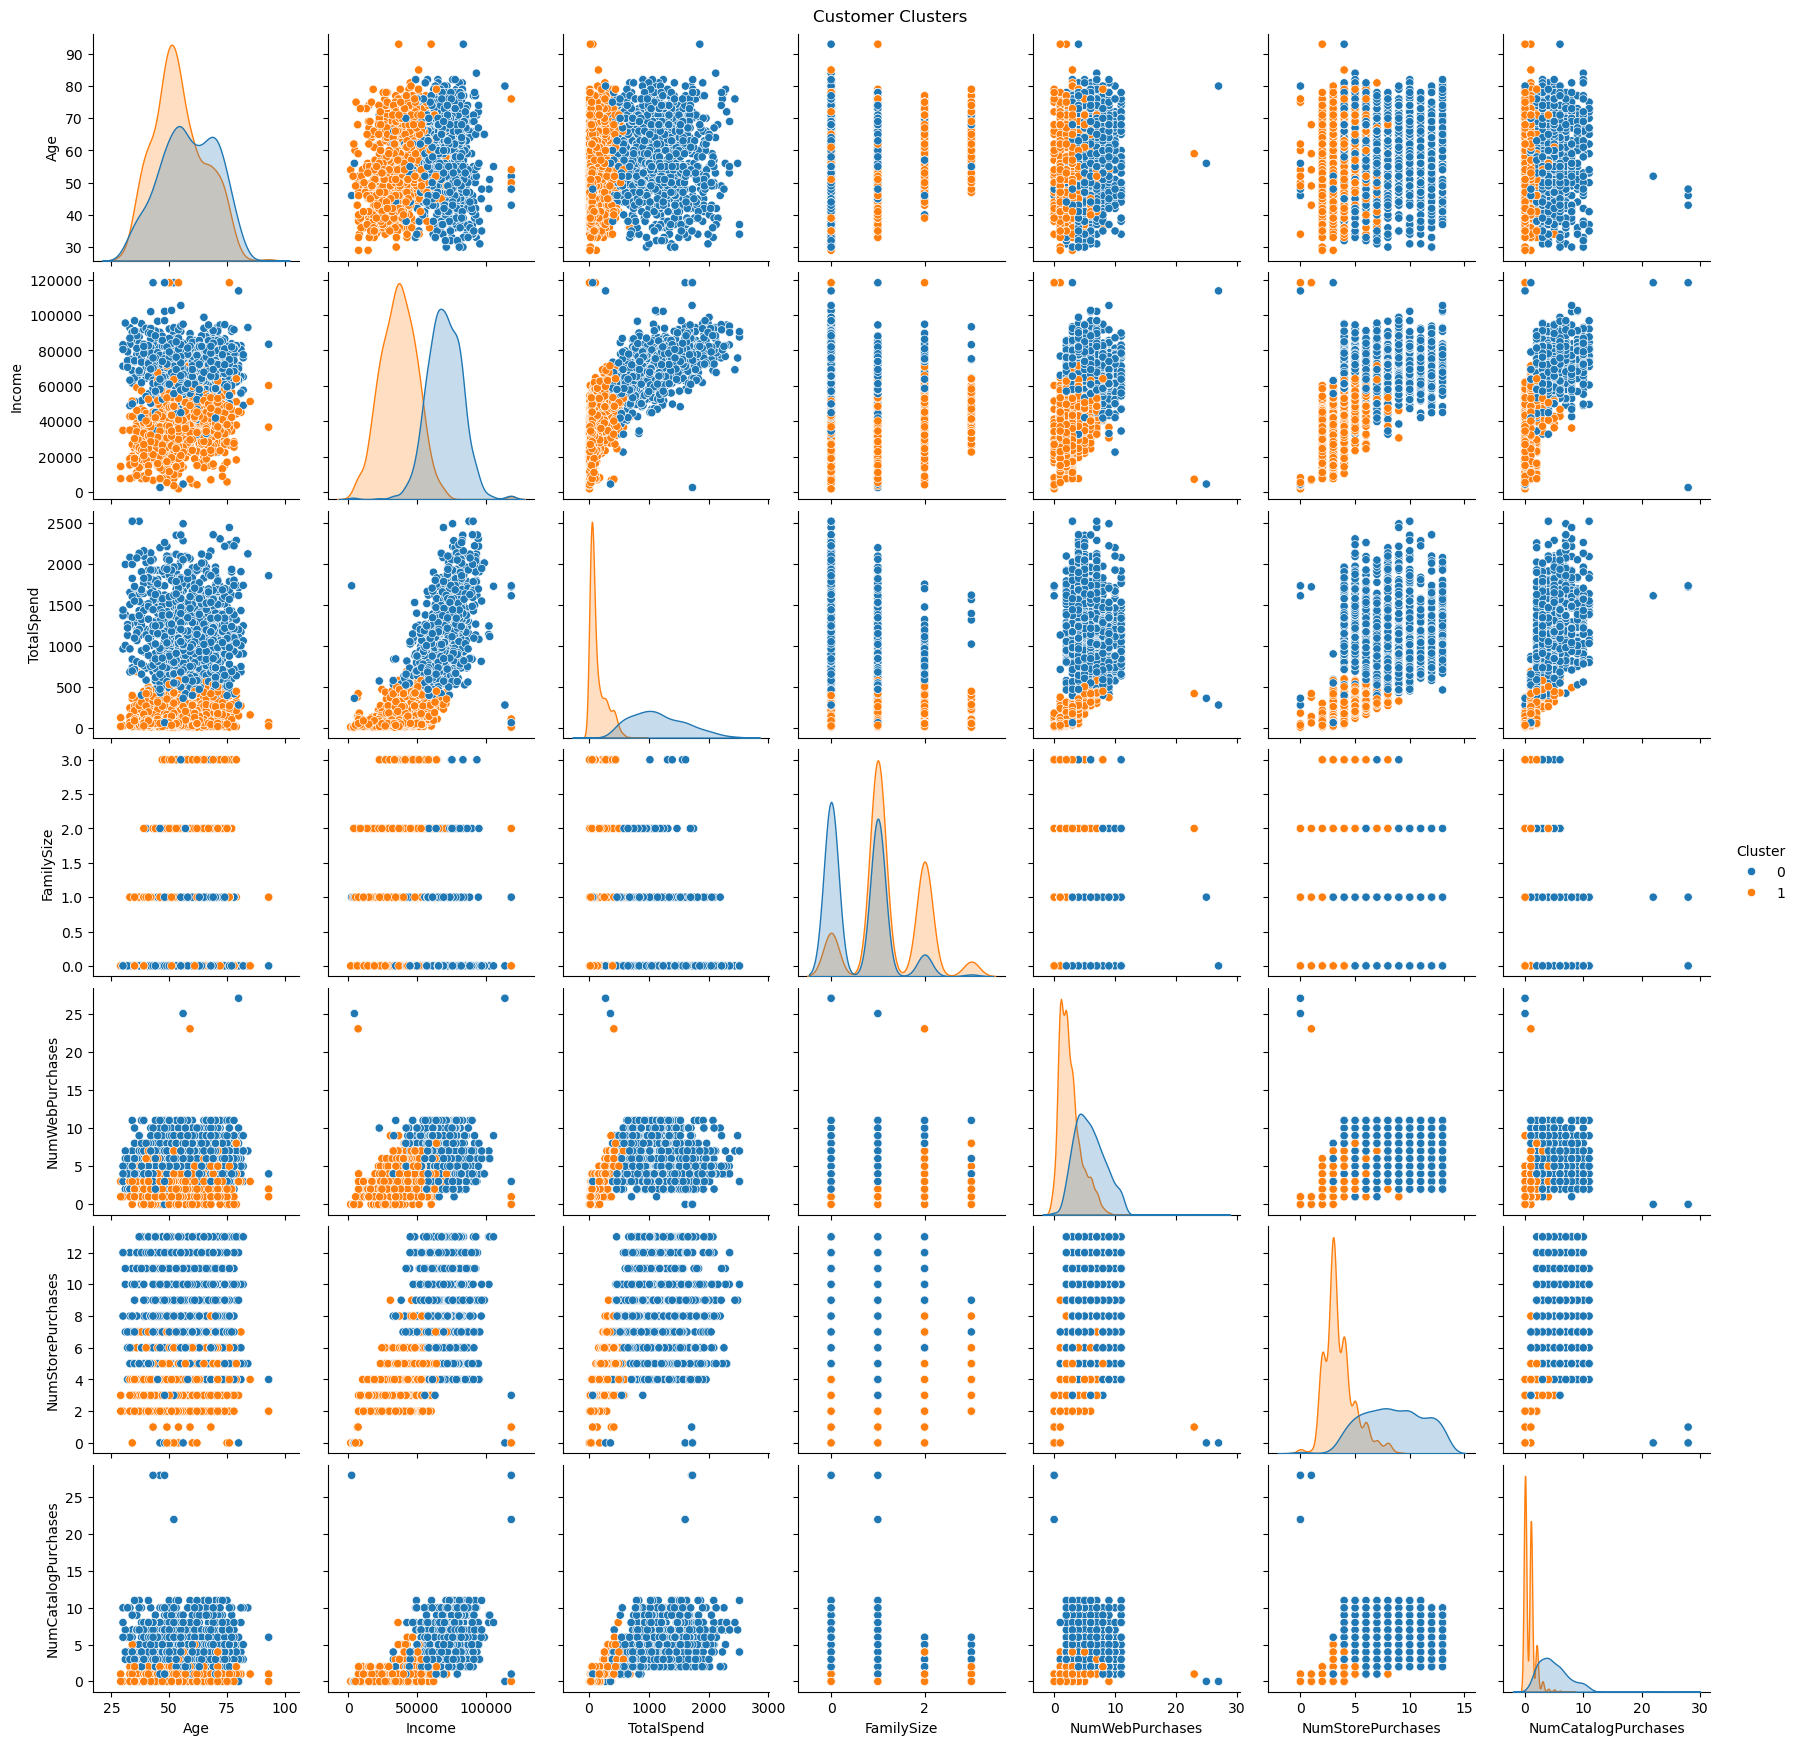

In [43]:
# Cluster Visualization
sns.pairplot(df1, vars=features, hue='Cluster', palette='tab10')
plt.suptitle("Customer Clusters", y=1)
plt.show()

## **Hierarchical Clustering**

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [50]:
df2=df.copy()
df2

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             1   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  \
0                0         0              3         11         1   68   
1                0         0              3         11         0   71   
2                0         0              3         11         0   60   
3                0         0              3         11         0   41   
4                0         0              3         11         0   44   
...            ...       ...            ...        ...       ...  ...   
2235             0         0              3         11         0   58   
2236             0         0              3         11         0   79   
2237             0         0              3         11         0   44   
2238             0         0              3         11         0   69   
2239             0         0              3         11         1   71   

      TotalSpend  TotalPurchases  FamilySize  
0         1617.0            32.0           0  
1           27.0            11.0           2  
2          776.0            25.0           0  
3           53.0            14.0           1  
4          422.0            24.0           1  
...          ...             ...         ...  
2235      1341.0            23.0           1  
2236       444.0            29.0           3  
2237      1241.0            25.0           0  
2238       843.0            26.0           1  
2239       172.0            18.0           2  

[2216 rows x 33 columns]

In [51]:
# Select features for clustering
feat = ['Age', 'Income', 'TotalSpend', 'FamilySize','NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
x = df2[feat]

In [52]:
# Standardize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

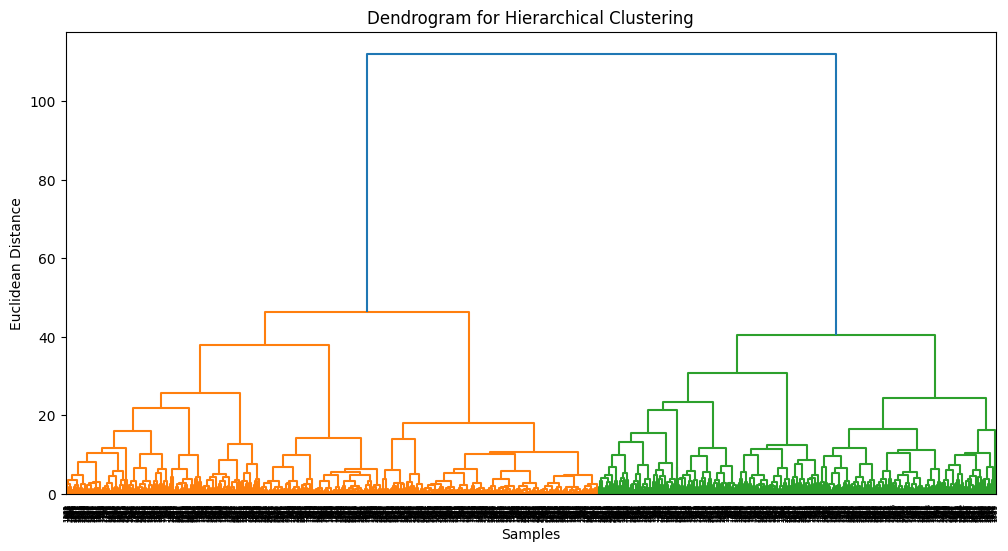

In [53]:
# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(x_scaled, method='ward'),
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

In [54]:
# --- Agglomerative Clustering (e.g., 4 clusters) ---
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_pred = hc.fit_predict(x_scaled)

In [55]:
hc_pred

array([1, 0, 3, ..., 3, 3, 0])

In [56]:
from sklearn.metrics import silhouette_score

In [57]:
 hc_score = silhouette_score(x_scaled,hc_pred)
 hc_score

np.float64(0.18391790979199094)

### Hyperparameter Tuning for Hierarchical Clustering

In [58]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': range(2,6),  # Test different numbers of clusters
    'linkage': ['ward', 'complete', 'average', 'single'],  # Test different linkage methods
    'metric': ['euclidean','cosine'] #Test different affinity metrics
}

best_score = -1
best_params = {}

for n_clusters in param_grid['n_clusters']:
  for linkage_method in param_grid['linkage']:
    for affinity_metric in param_grid['metric']:
      try:
          # Initialize Agglomerative Clustering with current hyperparameters
          hc = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')

          # Fit the model and predict cluster labels
          df2['HCluster'] = hc.fit_predict(x_scaled)

          # Calculate silhouette score
          hc_score = silhouette_score(x_scaled, df2['HCluster'])

          # Check if the current score is the best score
          if score > best_score:
              best_score = score
              best_params = {'n_clusters': n_clusters, 'linkage': linkage_method, 'affinity': affinity_metric}
          print(f"n_clusters: {n_clusters}, linkage: {linkage_method}, affinity: {affinity_metric}, hc_score: {hc_score}")

      except ValueError:
          # Handle cases where certain combinations of parameters are invalid
          print(f"Invalid parameter combination: n_clusters={n_clusters}, linkage={linkage_method}, affinity={affinity_metric}")
          continue

n_clusters: 2, linkage: ward, affinity: euclidean, hc_score: 0.18391790979199094
n_clusters: 2, linkage: ward, affinity: cosine, hc_score: 0.18391790979199094
n_clusters: 2, linkage: complete, affinity: euclidean, hc_score: 0.18391790979199094
n_clusters: 2, linkage: complete, affinity: cosine, hc_score: 0.18391790979199094
n_clusters: 2, linkage: average, affinity: euclidean, hc_score: 0.18391790979199094
n_clusters: 2, linkage: average, affinity: cosine, hc_score: 0.18391790979199094
n_clusters: 2, linkage: single, affinity: euclidean, hc_score: 0.18391790979199094
n_clusters: 2, linkage: single, affinity: cosine, hc_score: 0.18391790979199094
n_clusters: 3, linkage: ward, affinity: euclidean, hc_score: 0.18391790979199094
n_clusters: 3, linkage: ward, affinity: cosine, hc_score: 0.18391790979199094
n_clusters: 3, linkage: complete, affinity: euclidean, hc_score: 0.18391790979199094
n_clusters: 3, linkage: complete, affinity: cosine, hc_score: 0.18391790979199094
n_clusters: 3, linka

In [59]:
df2

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  \
0            0  2012-09-04       58       635  ...             0         0   
1            1  2014-03-08       38        11  ...             0         0   
2            0  2013-08-21       26       426  ...             0         0   
3            0  2014-02-10       26        11  ...             0         0   
4            0  2014-01-19       94       173  ...             0         0   
...        ...         ...      ...       ...  ...           ...       ...   
2235         1  2013-06-13       46       709  ...             0         0   
2236         1  2014-06-10       56       406  ...             0         0   
2237         0  2014-01-25       91       908  ...             0         0   
2238         1  2014-01-24        8       428  ...             0         0   
2239         1  2012-10-15       40        84  ...             0         0   

      Z_CostContact  Z_Revenue  Response  Age  TotalSpend  TotalPurchases  \
0                 3         11         1   68      1617.0            32.0   
1                 3         11         0   71        27.0            11.0   
2                 3         11         0   60       776.0            25.0   
3                 3         11         0   41        53.0            14.0   
4                 3         11         0   44       422.0            24.0   
...             ...        ...       ...  ...         ...             ...   
2235              3         11         0   58      1341.0            23.0   
2236              3         11         0   79       444.0            29.0   
2237              3         11         0   44      1241.0            25.0   
2238              3         11         0   69       843.0            26.0   
2239              3         11         1   71       172.0            18.0   

      FamilySize  HCluster  
0              0         1  
1              2         0  
2              0         3  
3              1         2  
4              1         3  
...          ...       ...  
2235           1         3  
2236           3         0  
2237           0         3  
2238           1         3  
2239           2         0  

[2216 rows x 34 columns]

In [60]:
# --- Cluster Profiles ---
print("\nHierarchical Cluster Profiles:")
print(df2.groupby('HCluster')[feat].mean().round())


Hierarchical Cluster Profiles:
           Age   Income  TotalSpend  FamilySize  NumWebPurchases  \
HCluster                                                           
0         60.0  44614.0       243.0         2.0              4.0   
1         57.0  75802.0      1392.0         0.0              5.0   
2         47.0  28058.0        70.0         1.0              2.0   
3         59.0  64230.0       938.0         1.0              7.0   

          NumStorePurchases  NumCatalogPurchases  
HCluster                                          
0                       4.0                  1.0  
1                       8.0                  6.0  
2                       3.0                  0.0  
3                       9.0                  4.0  


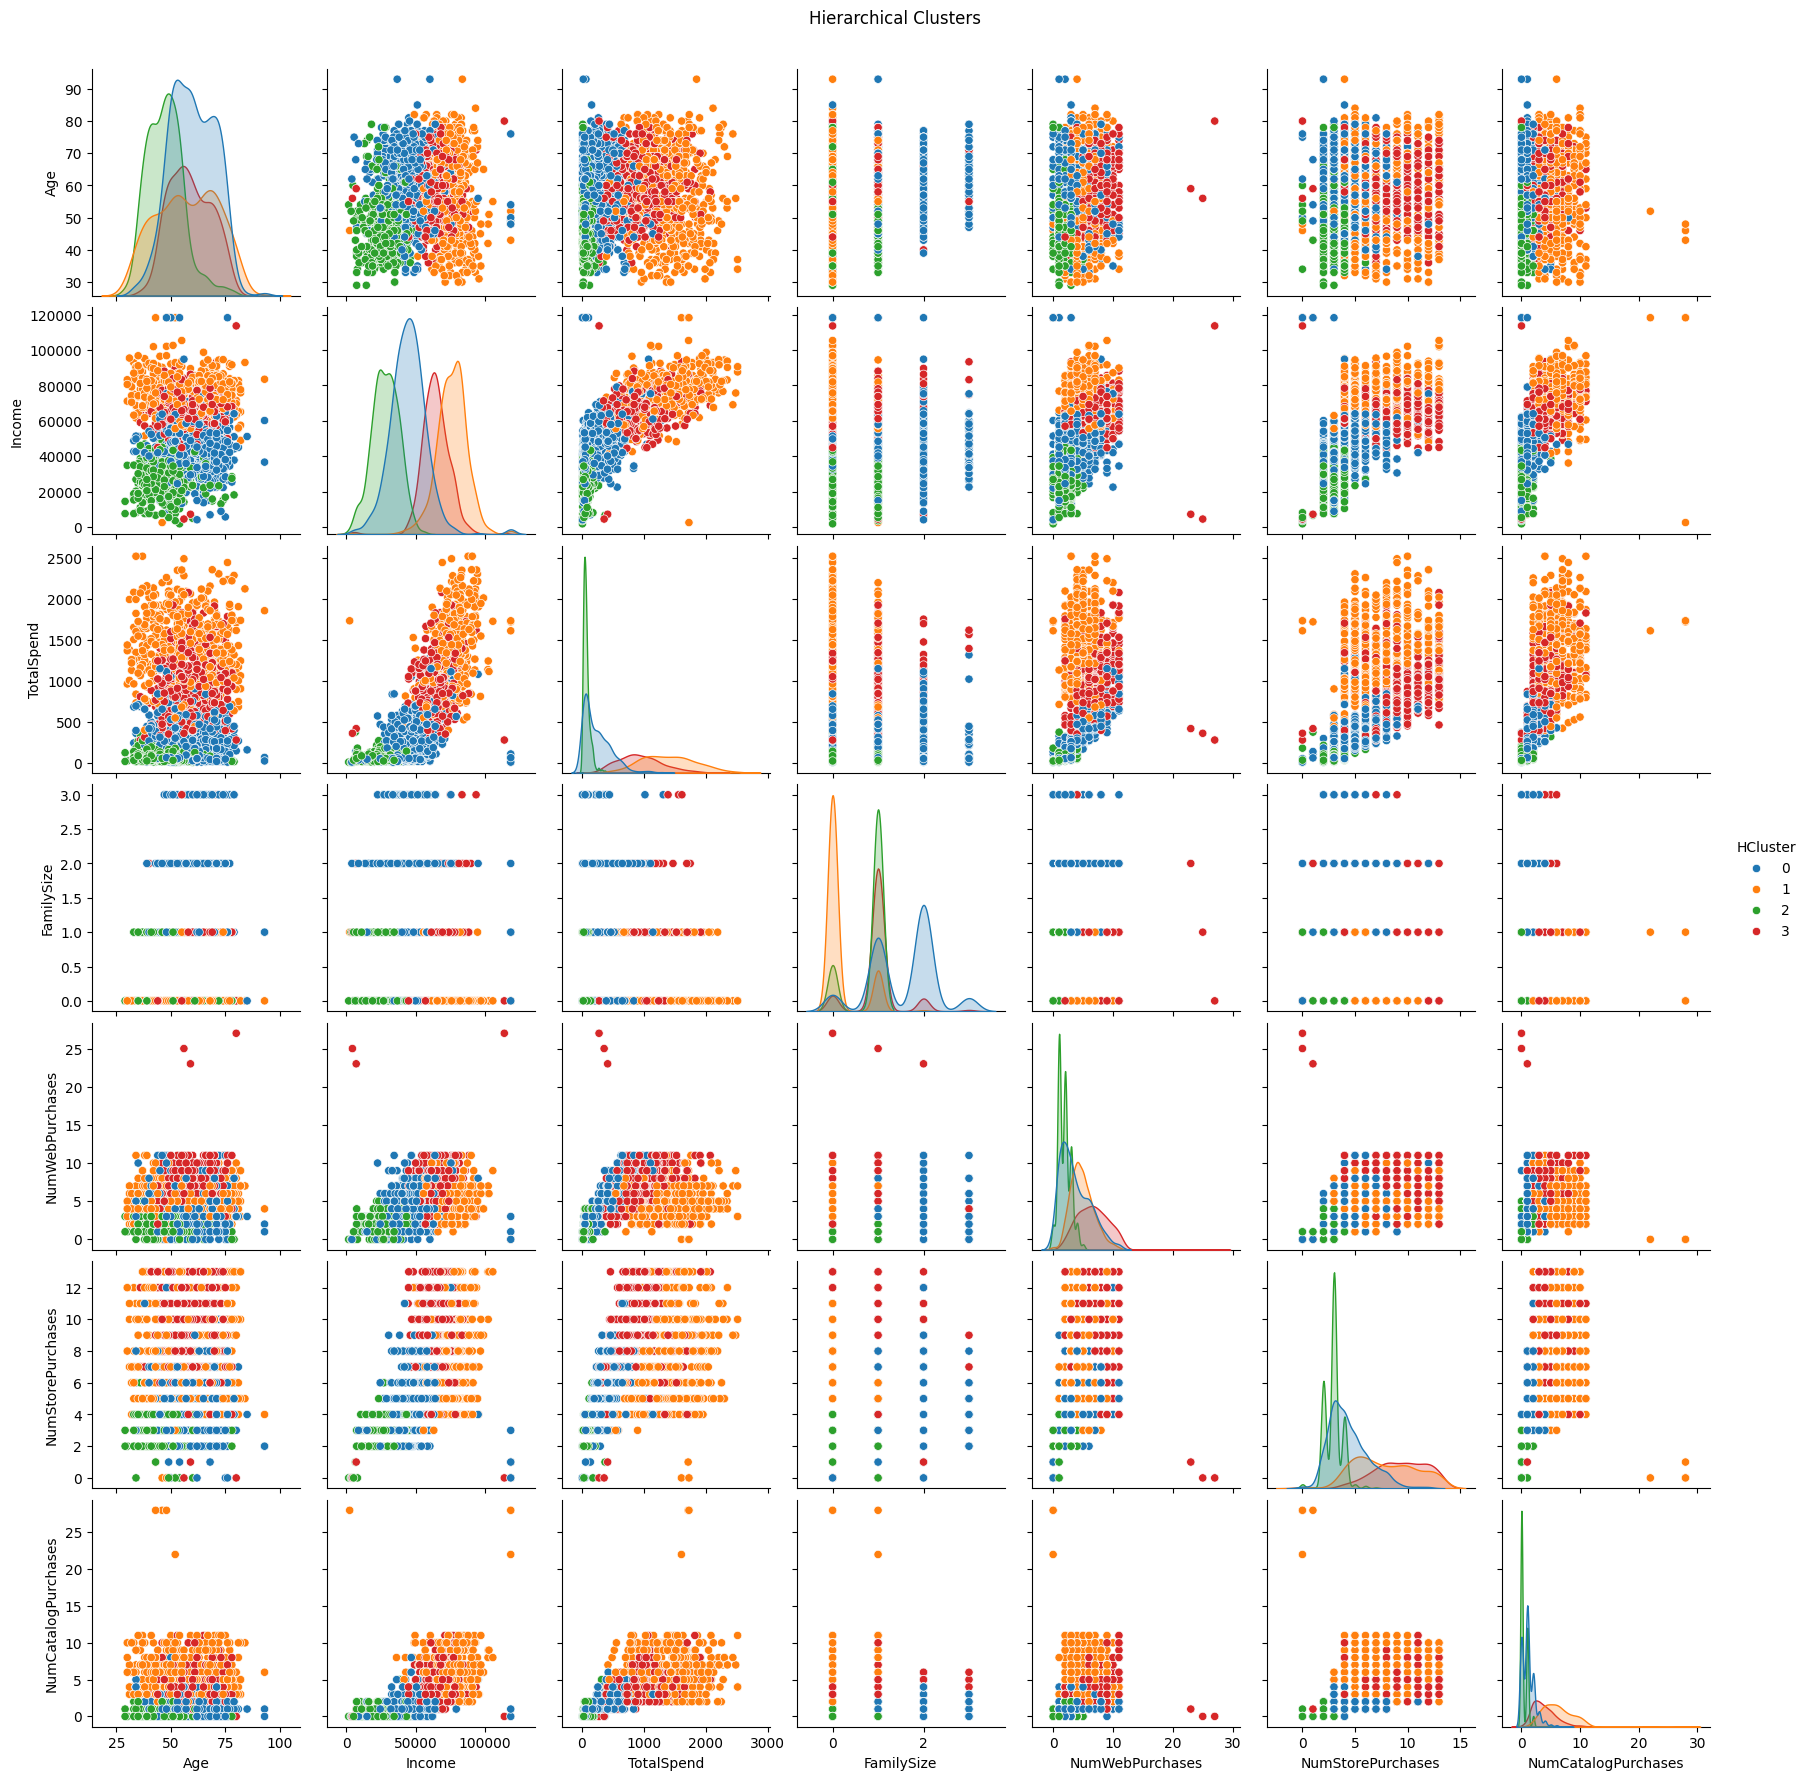

In [61]:
# Cluster Visualization
sns.pairplot(df2, vars=feat, hue='HCluster', palette='tab10')
plt.suptitle("Hierarchical Clusters", y=1.02)
plt.show()

# **DB Scan**

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
df3=df.copy()
df3

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             1   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age  \
0                0         0              3         11         1   68   
1                0         0              3         11         0   71   
2                0         0              3         11         0   60   
3                0         0              3         11         0   41   
4                0         0              3         11         0   44   
...            ...       ...            ...        ...       ...  ...   
2235             0         0              3         11         0   58   
2236             0         0              3         11         0   79   
2237             0         0              3         11         0   44   
2238             0         0              3         11         0   69   
2239             0         0              3         11         1   71   

      TotalSpend  TotalPurchases  FamilySize  
0         1617.0            32.0           0  
1           27.0            11.0           2  
2          776.0            25.0           0  
3           53.0            14.0           1  
4          422.0            24.0           1  
...          ...             ...         ...  
2235      1341.0            23.0           1  
2236       444.0            29.0           3  
2237      1241.0            25.0           0  
2238       843.0            26.0           1  
2239       172.0            18.0           2  

[2216 rows x 33 columns]

In [64]:
# Select features for clustering
fea = ['Age', 'Income', 'TotalSpend', 'FamilySize','NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
db = df3[fea]

In [65]:
# Standardize
scaler = StandardScaler()
db_scaled = scaler.fit_transform(db)

In [66]:
#DBscan
db = DBSCAN(eps=0.8, min_samples=6)
y = db.fit_predict(db_scaled)
y

array([-1,  0, -1, ..., -1,  1,  0])

In [67]:
# unique values in y
y_series = pd.Series(y)
# Get unique values
unique_values = y_series.unique()
# Print the unique values
unique_values

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

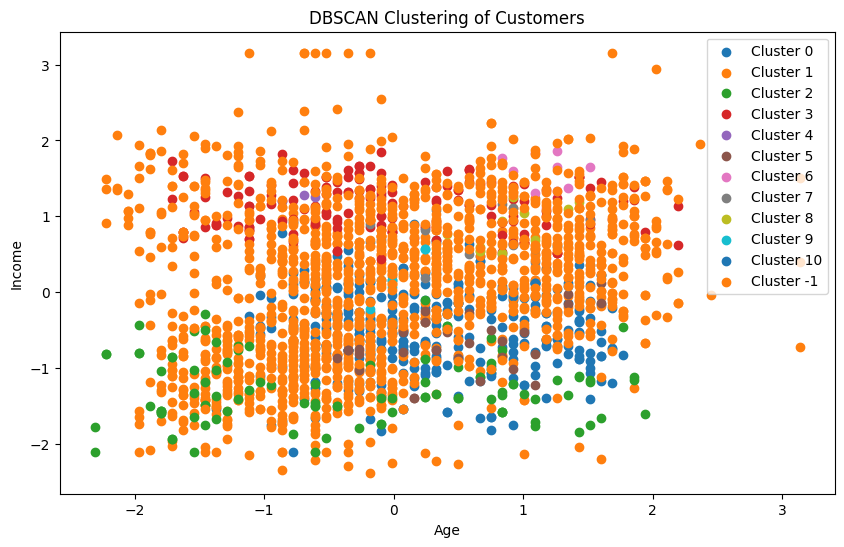

In [68]:
# plot scatter plot from fea with clusters

import matplotlib.pyplot as plt

# Assuming 'df3', 'fea', 'db_scaled', and 'y' are defined from the previous code

# Create the scatter plot
plt.figure(figsize=(10, 6))
for cluster_label in set(y):
    cluster_data = db_scaled[y == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering of Customers')
plt.xlabel(fea[0])  # Replace 0 with the index of the desired feature for x-axis
plt.ylabel(fea[1])  # Replace 1 with the index of the desired feature for y-axis
plt.legend()
plt.show()
# clusters are overlapping, purple data points are far away so they are outliers. So not a good model
# Confirm it with silhouette score

In [69]:
from sklearn.metrics import silhouette_score

In [70]:
DB_score = silhouette_score(db_scaled,y)
DB_score

np.float64(-0.11952900150140791)

### Hyperparameter Tuning for DB Scan

In [71]:
from sklearn.neighbors import NearestNeighbors
# NearestNeighbors will calculate avg distance by considering nearest data point

In [72]:
neighbor = NearestNeighbors(n_neighbors=3).fit(db_scaled) # fit will calculate distance using euclidean distance method
# n_neighbors:min sample. Calculate nearest 3 data points of each data point
# eps values will be selected randomly by algorithm

In [73]:
# distances (calculated with eps value) are stored in neighbor
d,index = neighbor.kneighbors(db_scaled)
# kneighbors() will show distances.
# It returns 2 values, d:euclidean distances: 3 distances are there in every list as we have selected min sample as 3
# row index: which data point is close to which other data point

In [74]:
neighbor.kneighbors(db_scaled)

(array([[0.        , 1.27214763, 1.40033955],
        [0.        , 0.26702026, 0.27710831],
        [0.        , 0.59843487, 0.95767459],
        ...,
        [0.        , 1.10125196, 1.1974358 ],
        [0.        , 0.31011757, 0.70012874],
        [0.        , 0.18397287, 0.40153031]]),
 array([[   0, 1487,  736],
        [   1, 1787, 1869],
        [   2,  122,  388],
        ...,
        [2213,  666, 1042],
        [2214,  993, 1297],
        [2215, 1367, 1785]]))

In [75]:
d[:,1]

array([1.27214763, 0.26702026, 0.59843487, ..., 1.10125196, 0.31011757,
       0.18397287])

In [76]:
distance = np.sort(d[:,1]) # consider all rows and 1st nearest neighbor values i.e.2nd column

In [77]:
distance

array([0.        , 0.        , 0.        , ..., 2.47875216, 5.66698714,
       5.78312483])

Text(0.5, 1.0, 'K-Distance Graph')

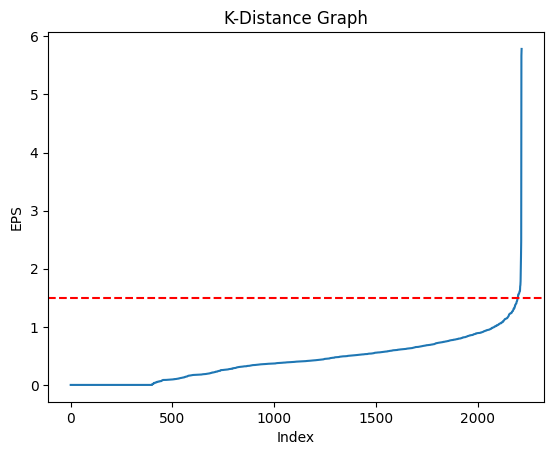

In [81]:
plt.plot(distance)
plt.axhline(y=1.5, linestyle = '--', color='red') # y=1 means draw horizontal lint at eps=2
plt.xlabel('Index')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [ ]:
# Model Evaluation

In [83]:
DB = DBSCAN(eps=1.5, min_samples=8) # default eps=0.5
yp = db.fit_predict(db_scaled)
yp

array([-1,  0, -1, ..., -1,  1,  0])

In [84]:
# unique values in y
yp_series = pd.Series(yp)
# Get unique values
unique_values_yp = y_series.unique()
# Print the unique values
unique_values_yp

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

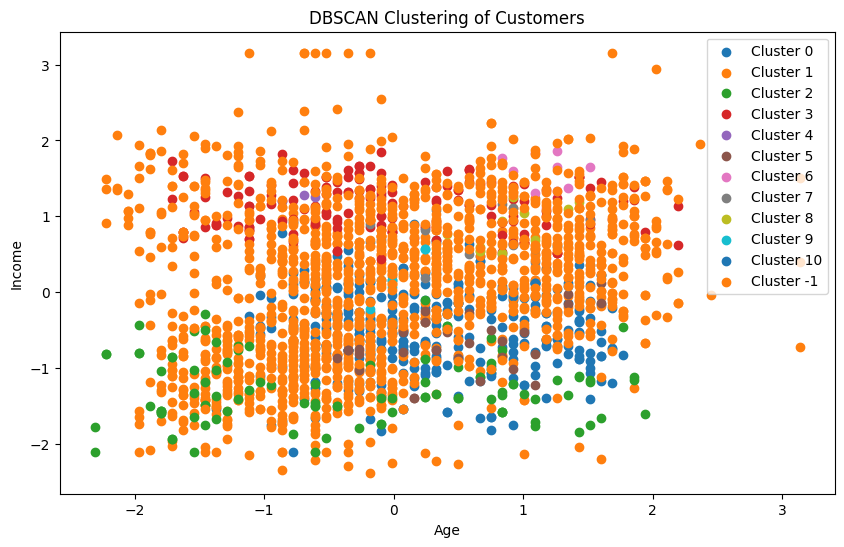

In [85]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
for Cluster_label in set(yp):
    Cluster_data = db_scaled[yp == Cluster_label]
    plt.scatter(Cluster_data[:, 0], Cluster_data[:, 1], label=f'Cluster {Cluster_label}')

plt.title('DBSCAN Clustering of Customers')
plt.xlabel(fea[0])  # Replace 0 with the index of the desired feature for x-axis
plt.ylabel(fea[1])  # Replace 1 with the index of the desired feature for y-axis
plt.legend()
plt.show()

In [86]:
db_score = silhouette_score(db_scaled,yp)
db_score

np.float64(-0.11952900150140791)

## Comparison between three Models

In [87]:
print(f"Silhouette score for kMeans: {KM_score}")
print(f"Silhouette score for Hierarchical : {hc_score}")
print(f"Silhouette score for DB Scan: {db_score}")

Silhouette score for kMeans: 0.3819600521273969
Silhouette score for Hierarchical : 0.18391790979199094
Silhouette score for DB Scan: -0.11952900150140791


In [58]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=2, random_state=42))
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

In [59]:
import pickle

In [60]:
# Save the pipeline
with open("best_kmeans_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)